In [1]:
from netCDF4 import Dataset
from netCDF4._netCDF4 import Variable

fn = "data/IMERG_land_sea_mask.nc"
ds = Dataset(fn)

In [20]:
from numpy import flip, array, sum

lon = array(ds.variables["lon"])
lat = array(ds.variables["lat"])
landseamask = flip(ds.variables["landseamask"], axis=0)
total_sea_cells = sum(sum(landseamask))
landsea_weights = (landseamask / 255 - total_sea_cells / (len(lat) * len(lon))) / total_sea_cells 

In [21]:
len(lat) * len(lon)

6483600

In [24]:
total_sea_cells / 128

3426197.0

In [18]:
max(landsea_weights)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
sum(sum(landsea_weights))

3.3690594e-07

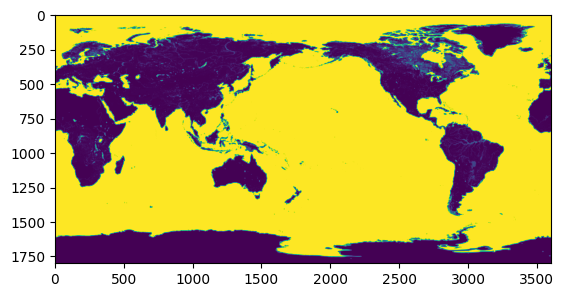

In [12]:
import matplotlib.pyplot as plt

plt.imshow(landseamask)